In [1]:
#Importaciones necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


# Importar funciones personalizadas
target_path = "../src/"
import sys
sys.path.append(target_path)

#improtaciones SRC
import sp_visualizacion
import sp_limpieza

# Importar las funciones del archivo 'sp_limpieza.py' y sp_eda.py' en 'src'
from sp_limpieza import convertir_float_a_int
from sp_visualizacion import graficar_boxplots
from sp_visualizacion import graficar_numericas

In [2]:
# Cargar el archivo limpio
df_limpio= pd.read_csv("../data/bank_limpio.csv")

In [3]:
df_limpio = convertir_float_a_int(df_limpio, ['age', 'default', 'housing', 'loan'])



In [4]:
#Mostrar las primeras filas para verificar
df_limpio.head(2)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,id_,year,month,day
0,<NA>,housemaid,married,basic,0,0,0,telephone,261,1,999,0,1.1,93994.0,-364.0,4857.0,5191.0,no,089b39d8-e4d0-461b-87d4-814d71e0e079,2019,8,2
1,57,services,married,high.school,<NA>,0,0,telephone,149,1,999,0,1.1,93994.0,-364.0,NaN,5191.0,no,e9d37224-cb6f-4942-98d7-46672963d097,2016,9,14


In [5]:
# identificamos columnas numericas
df_limpio.select_dtypes(include=np.number).columns


Index(['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'year', 'month', 'day'],
      dtype='object')

In [6]:
df_limpio.describe().T


,count,mean,std,min,25%,50%,75%,max
age,37880.0,39.977112,10.437957,17.0,32.0,38.0,47.0,98.0
default,34019.0,0.000088,0.00939,0.0,0.0,0.0,0.0,1.0
housing,41974.0,0.535998,0.498708,0.0,0.0,1.0,1.0,1.0
loan,41974.0,0.15562,0.362499,0.0,0.0,0.0,0.0,1.0
duration,43000.0,257.739279,258.666033,0.0,102.0,179.0,319.0,4918.0
campaign,43000.0,2.567233,2.772294,1.0,1.0,2.0,3.0,56.0
pdays,43000.0,962.330953,187.260394,0.0,999.0,999.0,999.0,999.0
previous,43000.0,0.174023,0.497366,0.0,0.0,0.0,0.0,7.0
emp_var_rate,43000.0,0.077128,1.573898,-3.4,-1.8,1.1,1.4,1.4
cons_price_idx,42529.0,85479.697689,26225.07061,932.0,92893.0,93749.0,93994.0,94767.0


In [7]:
# crear df solo con las que nos interesan
columnas_interes = ['age', 'default', 'housing', 'loan', 'duration', 'campaign', 
                     'pdays', 'previous', 'emp_var_rate', 'euribor3m', 'nr_employed']

df_numericas = df_limpio[columnas_interes]
df_numericas.head()


,age,default,housing,loan,duration,campaign,pdays,previous,emp_var_rate,euribor3m,nr_employed
0,<NA>,0,0,0,261,1,999,0,1.1,4857.0,5191.0
1,57,<NA>,0,0,149,1,999,0,1.1,NaN,5191.0
2,37,0,1,0,226,1,999,0,1.1,4857.0,5191.0
3,40,0,0,0,151,1,999,0,1.1,NaN,5191.0
4,56,0,0,1,307,1,999,0,1.1,NaN,5191.0


In [8]:
df_numericas.nunique()


age               78
default            2
housing            2
loan               2
duration        1540
campaign          42
pdays             27
previous           8
emp_var_rate      10
euribor3m        309
nr_employed       11
dtype: int64

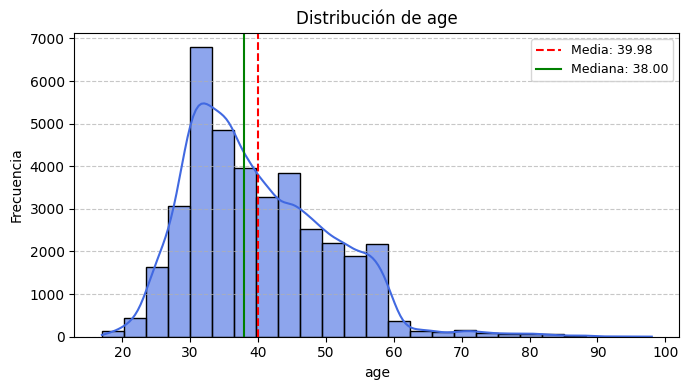

In [9]:
# Prueba con la columna 'age'
graficar_numericas(df_numericas, 'age')


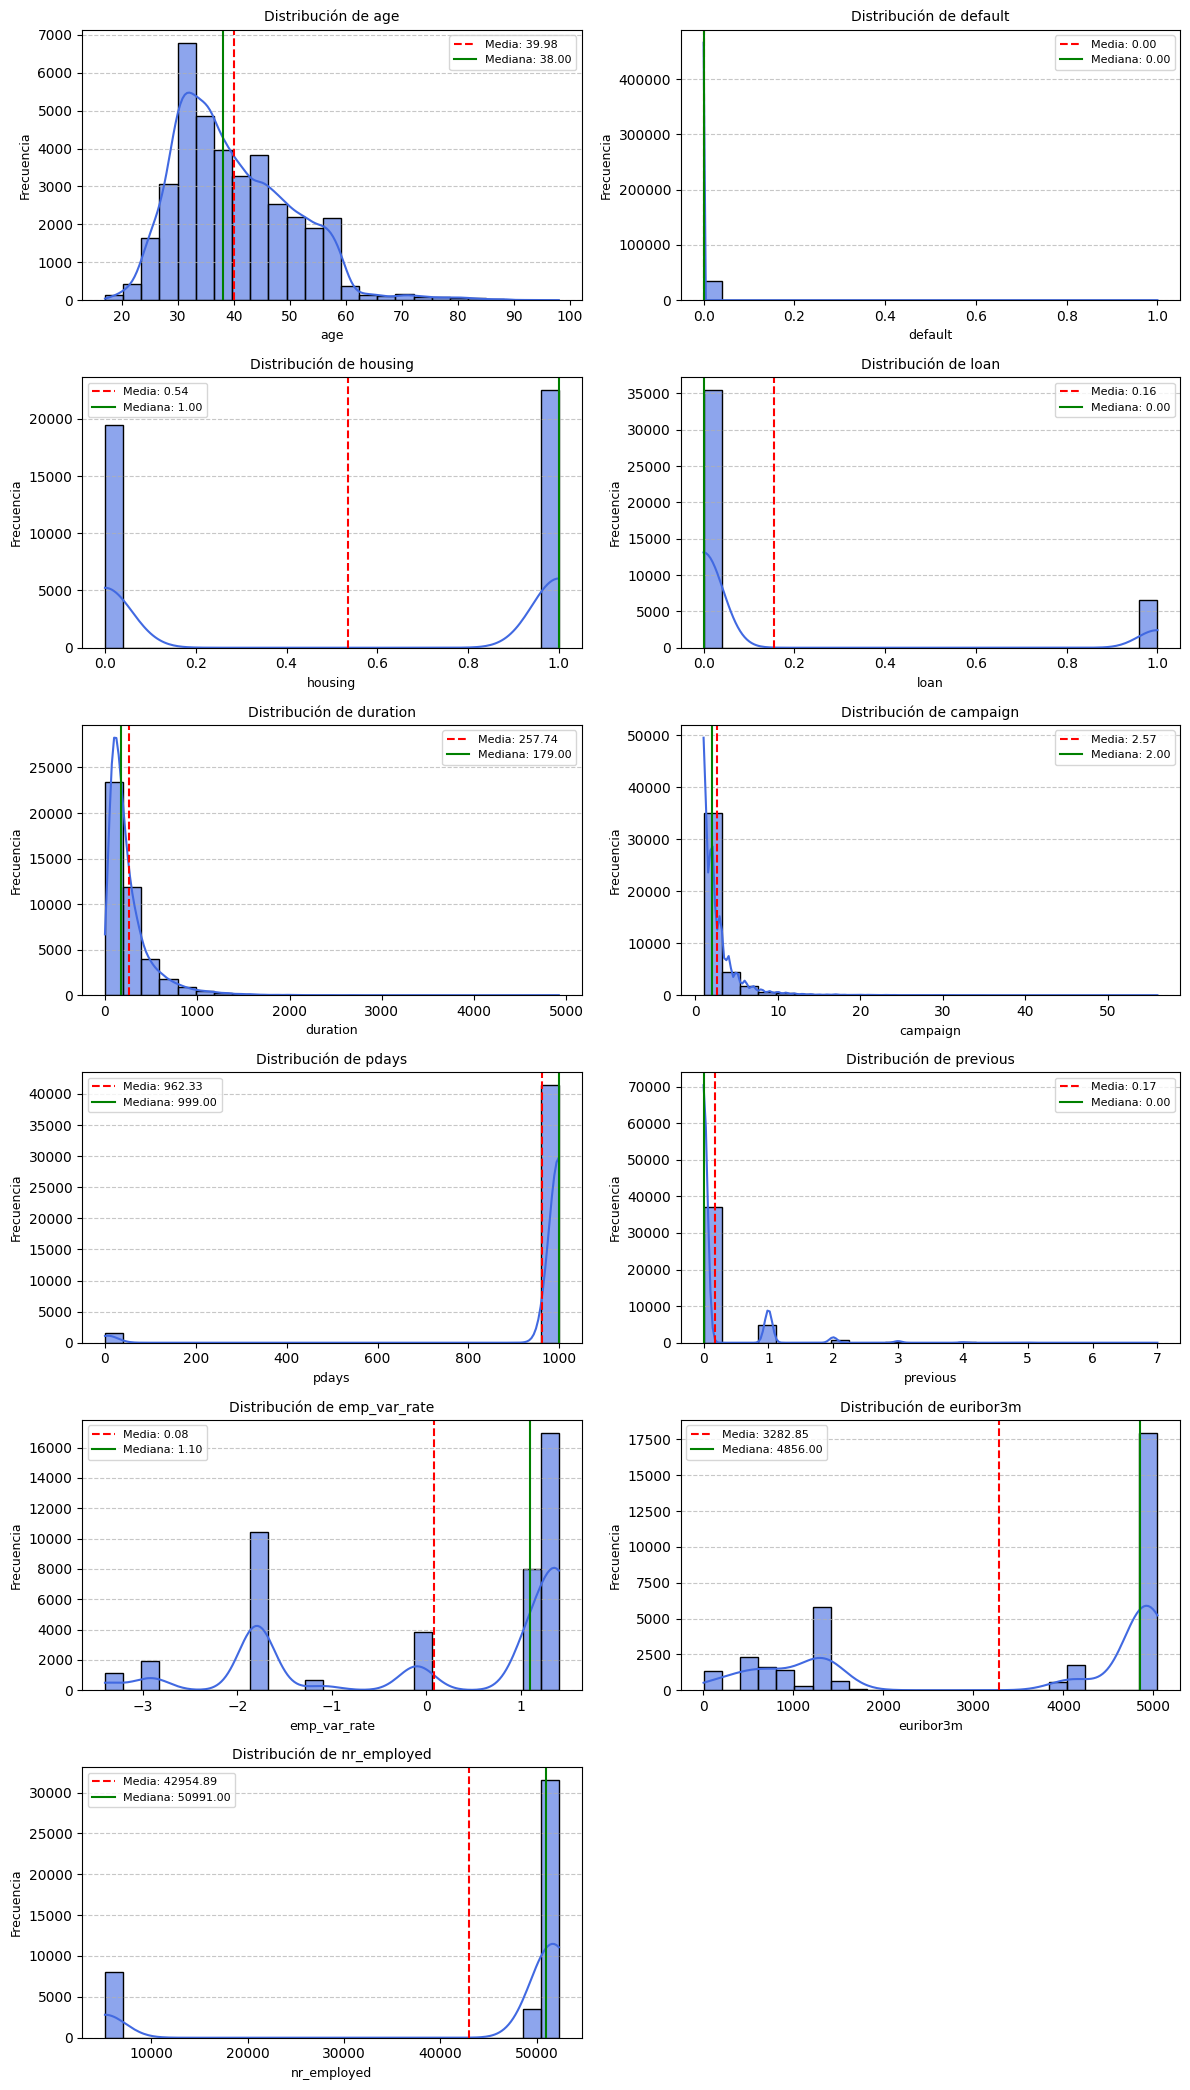

In [10]:
graficar_numericas(df_numericas)

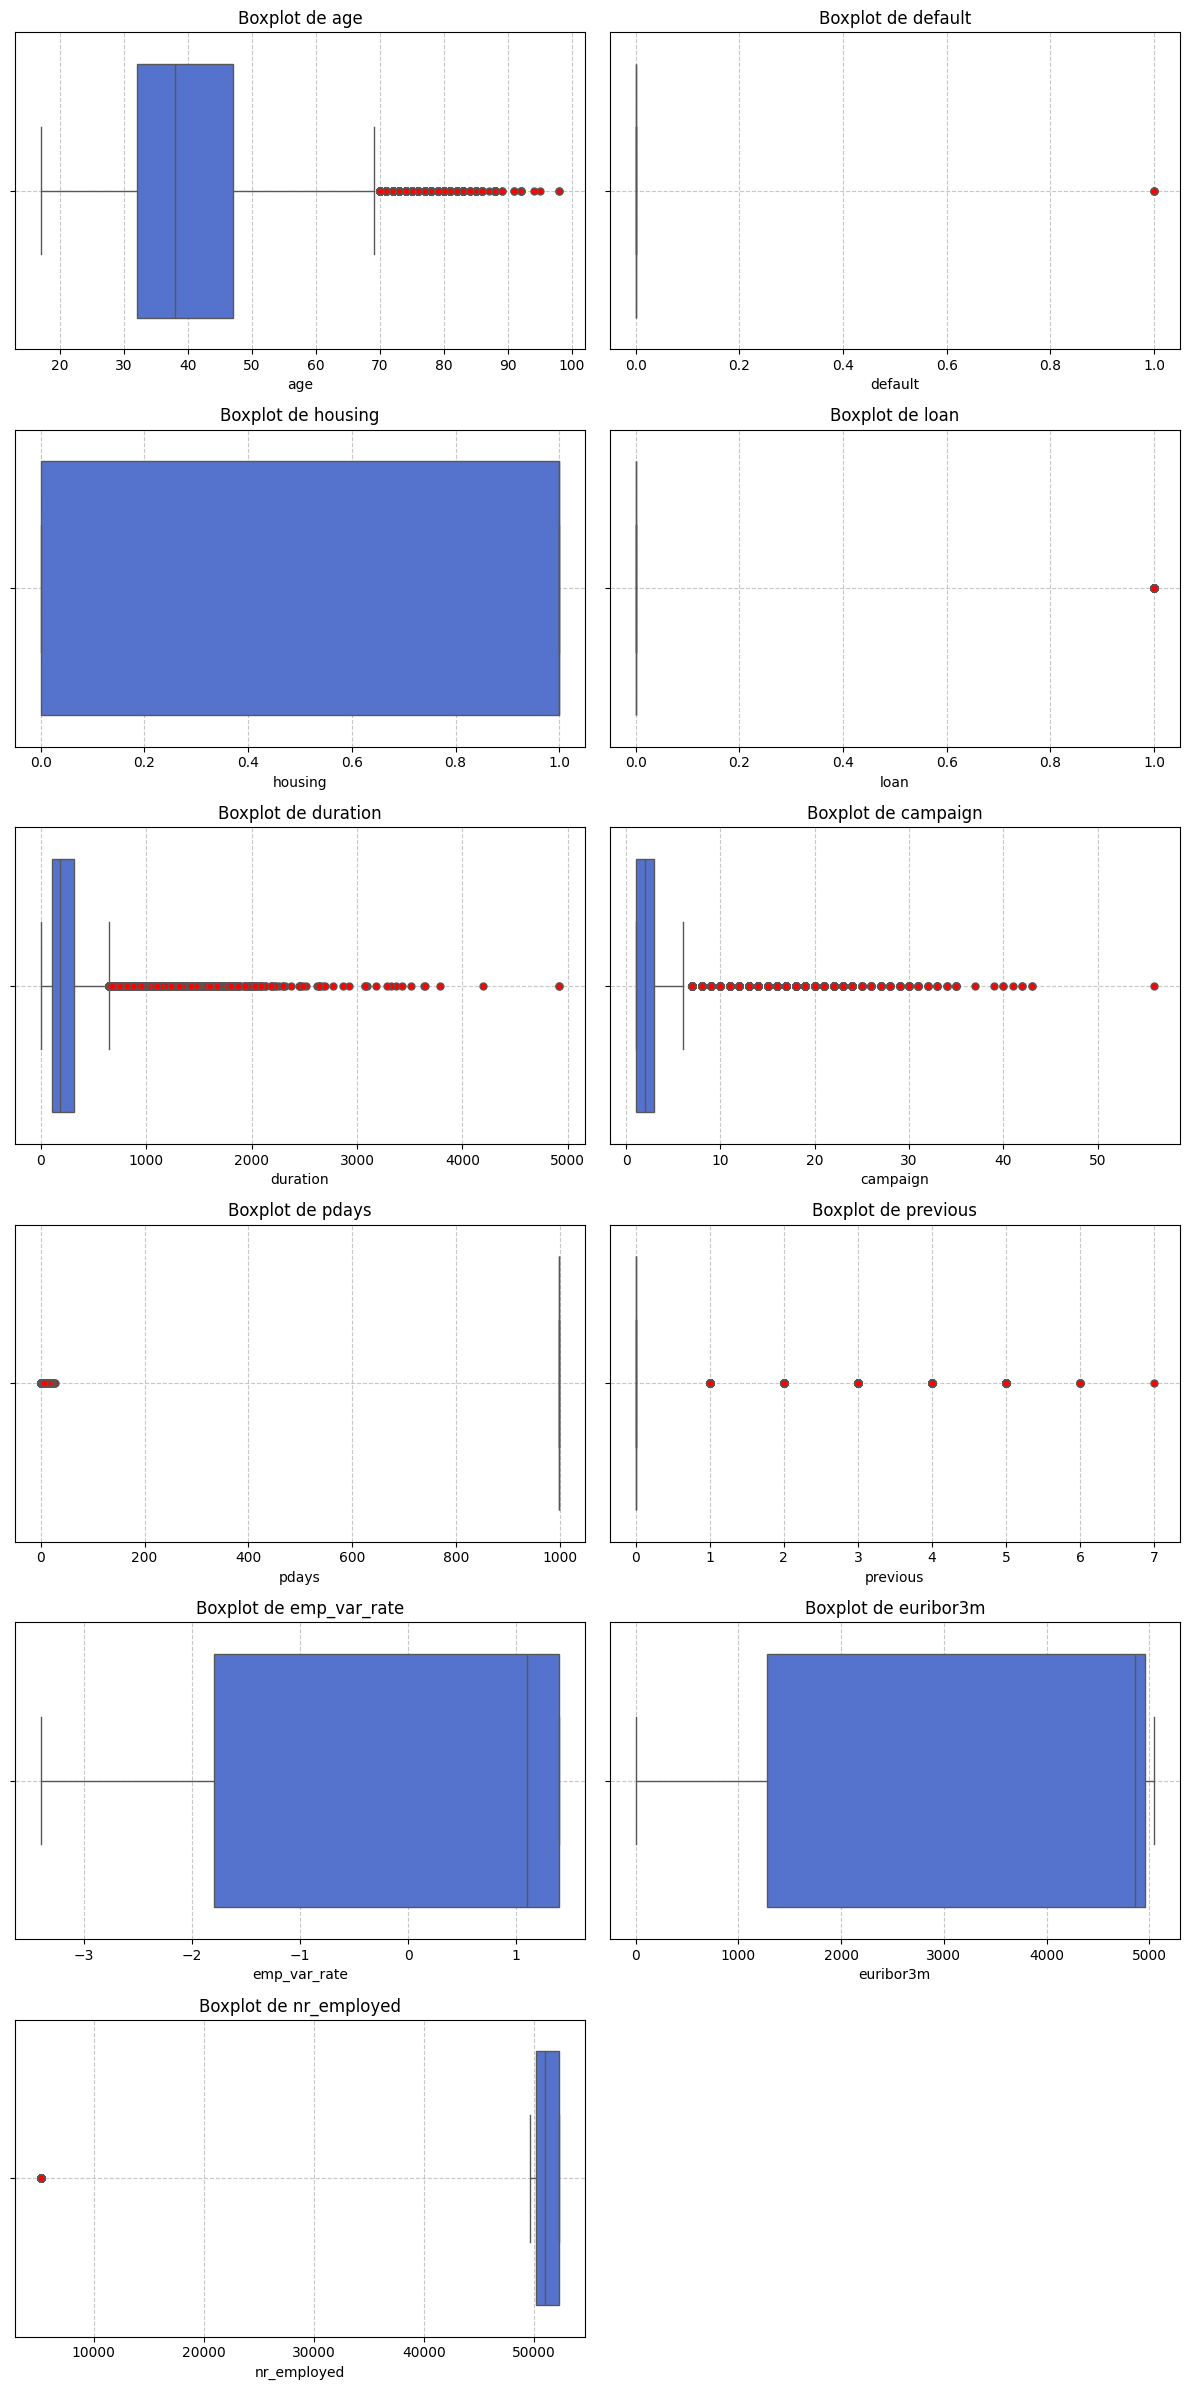

In [11]:
graficar_boxplots(df_numericas)

In [12]:
# identificacion de outliers
Q1 = df_numericas.quantile(0.25)  # Primer cuartil (25%)
Q3 = df_numericas.quantile(0.75)  # Tercer cuartil (75%)
IQR = Q3 - Q1  # Rango intercuartil

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = (df_numericas < limite_inferior) | (df_numericas > limite_superior)
outliers.sum()


age              441
default            3
housing            0
loan            6532
duration        3072
campaign        2504
pdays           1588
previous        5897
emp_var_rate       0
euribor3m          0
nr_employed     8020
dtype: Int64